# Parte 1: Optimización 

En este notebook vamos a comenzar trabajando con la librería **Scipy**, que usa numpy como base e introduce módulos para la programación científica, como los módulos de optimización

En los problemas de optimización matemática vamos a tener los siguientes puntos clave:
1. **Objetivo a optimizar**: por ejemplo, maximizar las ventas de una empresa, o minimizar los costes
2. **Variables**: qué variables afectan a nuestro objetivo
3. **Restricciones**: qué limitaciones pueden existir para llegar al objetivo

<img src='./img/opt.jpg' width = 500>

Generalmente, los métodos de optimización que encontremos al programar van a buscar **minimizar**. 

Si nuestro problema consiste en maximizar una función ***f***, lo que haremos será minimizar ***-f***, lo cual es equivalente

### Ejemplo 1

En una fábrica en la que se producen piezas para automóviles existen dos costes predominantes: el coste de los empleados (20€ por hora), y el coste del acero (170€ por tonelada). Los beneficios se modelan con la siguiente función:

$$B(h,a)=200\cdot h \cdot a$$

donde h representa las horas de trabajo y a representa las toneladas de acero. Se quiere optimizar el beneficio, con un presupuesto limitado de 20.000€.

**Solución**: Siendo el coste por hora de 20€ y el coste por tonelada de acero de 170€, tenemos que el coste total de producción, en términos de h y a es:

$20h+170a$

Por tanto, si el presupuesto es de 20.000€, podemos definir la restricción:

$20h+170a=20000$

Por tanto, tratamos de resolver el siguiente problema:

**Maximizar**  
$B(h,a)=200 \cdot h \cdot a$  
sujeto a $20h+170a=20000$

In [1]:
import numpy as np
from scipy.optimize import minimize

```Python
parametros = [h,a]
```

1. Define la función objetivo a minimizar

In [2]:
def objective(parametros):
    h = parametros[0]
    a = parametros[1]
    B = 200*h*a
    return -B

2. Define las restricciones

In [3]:
def constraint(parametros):
    h = parametros[0]
    a = parametros[1]
    return 20*h + 170*a - 20000

constraint1 = {'type':'eq', 'fun':constraint}

restricc = [constraint1]

3. Definimos límites de nuestras variables

In [4]:
bounds_h = (0,1000)
bounds_a = (0,1000) 

bounds = [bounds_h, bounds_a]

4. Define un valor inicial para *h* y *a*

In [5]:
x0 = [10,10]

5. Aplicamos la función de minimización [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html), con los siguientes parámetros:
* `fun`: función objetivo a minimizar
* `x0`: lista con los valores iniciales
* `method`: tipo de método de optimización (lo dejamos por defecto)
* `bounds`: límites de las variables
* `constraints`: lista de restricciones

In [6]:
result = minimize(objective,x0,bounds=bounds,constraints=restricc)

In [7]:
result

     fun: -5882352.9411764415
     jac: array([ -11764.6875, -100000.    ])
 message: 'Optimization terminated successfully'
    nfev: 33
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([500.00003479,  58.82352532])

In [12]:
res = result.x
res

array([500.00003479,  58.82352532])

Calculamos el beneficio máximo

In [13]:
B = 200 * res[0] * res[1]
B

5882352.9411764415

Nos aseguramos que se cumple la restricción

In [14]:
20*res[0] + 170*res[1]

20000.0

## Ejemplo 2

El Levante vende 1000 camisetas cada mes a un precio de 12 euros. Tras realizar una encuesta, se estima que por cada incremento de 1 euro en el precio, se venderían 10 camisetas menos. El levante quiere vender al menos 800 camisetas al mes.

¿A qué precio debe vender el Levante las camisetas para maximizar sus beneficios? ¿Cuál será el nuevo beneficio esperado?

$$Beneficio(B) = Precio(P) \times Cantidad(C)$$
$$B=(12+x) \times (1000-10x)$$

<span style="color:blue">$$\text{Maximizar  } B = -10x^2+880x+12000 \\ \text{ sujeto a } 1000-10x\geq800$$</span> 

<span style="color:green">$$\text{Maximizar  } B = -10x^2+880x+12000 \\ \text{ sujeto a } x\leq20$$</span> 

In [28]:
# 1. Define la función objetivo a minimizar

def objective(x):
    return -(-10 * x**2 + 880*x + 12000)

In [29]:
# 2. Define las restricciones

def constraint(x):
    return 20-x

constraint1 = {'type':'ineq', 'fun':constraint}

restr = [constraint1]

In [30]:
# 3. Definir límites

bounds_x = (0,1000)

bounds = [bounds_x]

In [31]:
# 4. Definir valores iniciales
x0 = 10

In [32]:
# 5. Aplicar la optimización
result = minimize(objective, x0, bounds=bounds, constraints=restr)

In [33]:
result

     fun: array([-25599.99999999])
     jac: array([-480.])
 message: 'Optimization terminated successfully'
    nfev: 5
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([20.])

Por tanto, el incremento óptimo es $x=20$.   
El precio que maximiza los beneficios será $P=12+1\times20=32€$  
El beneficio esperado será $B=32\times(1000-10\times20)=25600€$

# Parte 2: Mínimos cuadrados 

Se ha hecho una encuesta a 20 personas, preguntándoles por sus ingresos anuales en miles de euros y su nivel de felicidad en una escala del 0 al 10.   
Los resultados obtenidos se guardan en las listas `x` (ingresos) e `y` (felicidad)

```Python
x = [25.2, 15.6, 26, 24, 39.2, 17.6, 3.6, 24, 10, 8.8, 35.2, 22.8, 31.6, 6, 11.2, 5.2, 22.4, 20.4, 31.2, 19.6]
y = [10, 5, 9, 8, 10, 8, 1, 9, 3, 3, 11, 5, 11, 2, 4, 4, 9, 6, 10, 7]
```

In [54]:
x = [25.2, 15.6, 26, 24, 39.2, 17.6, 3.6, 24, 10, 8.8, 35.2, 22.8, 31.6, 6, 11.2, 5.2, 22.4, 20.4, 31.2, 19.6]
y = [10, 5, 9, 8, 10, 8, 1, 9, 3, 3, 11, 5, 11, 2, 4, 4, 9, 6, 10, 7]

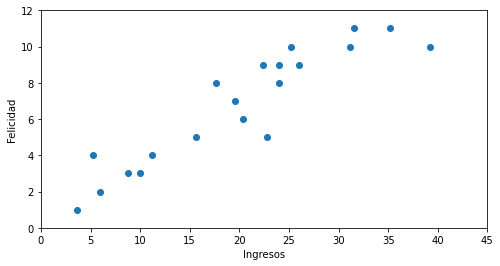

In [35]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(8, 4))
ax = plt.axes()
ax.scatter(x, y)
ax.set_ylim([0,12])
ax.set_xlim([0,45])
ax.set_xlabel('Ingresos')
ax.set_ylabel('Felicidad')


plt.show()

Buscamos la recta $h(x)=w_0+w_1x$ que mejor ajuste los puntos, aplicando mínimos cuadrados

1. Creamos la matrix $X=\begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$

In [40]:
X = np.array([np.ones(len(x)),
              np.array(x)]).transpose()
X

array([[ 1. , 25.2],
       [ 1. , 15.6],
       [ 1. , 26. ],
       [ 1. , 24. ],
       [ 1. , 39.2],
       [ 1. , 17.6],
       [ 1. ,  3.6],
       [ 1. , 24. ],
       [ 1. , 10. ],
       [ 1. ,  8.8],
       [ 1. , 35.2],
       [ 1. , 22.8],
       [ 1. , 31.6],
       [ 1. ,  6. ],
       [ 1. , 11.2],
       [ 1. ,  5.2],
       [ 1. , 22.4],
       [ 1. , 20.4],
       [ 1. , 31.2],
       [ 1. , 19.6]])

2. Creamos el vector $y=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}$ 

In [58]:
y = np.array(y)
y.transpose().shape

(20,)

3. Resolvemos la ecuación matricial para obtener los coeficientes óptimos de la recta

  $w = (X^TX)^{-1}X^Ty$

In [42]:
w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
w

array([1.02927146, 0.28632275])

Comprueba que la recta se ajusta a los puntos llamando a la siguiente función

In [44]:
def plot_all(w0,w1):

    plt.figure(figsize=(8, 4))
    ax = plt.axes()
    ax.scatter(x, y)
    ax.set_ylim([0,12])
    ax.set_xlim([0,45])
    ax.set_xlabel('Ingresos')
    ax.set_ylabel('Felicidad')
    e = np.linspace(0,45,len(x))
    z = w0+w1*e

    plt.plot(e, z, '-r', label='h(x)='+str(round(w0,2))+' + '+ str(round(w1,2))+'x')
    plt.legend(loc='upper left')
    plt.show()

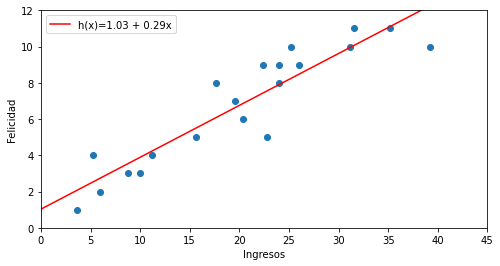

In [49]:
plot_all(w[0], w[1])

¿Cuál sería el nivel de felicidad de los que ganan 20.000€?

In [52]:
ingresos = 20
felicidad = w[0] + w[1]*ingresos
felicidad

6.75572645499012